In [1]:
%pwd

'/Users/seunghwankim/PycharmProjects/Python_Project/JupyterNote/DataAnaly/NoteBooks'

In [10]:
!pip install yfinance

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
     |████████████████████████████████| 11.5 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 7.2 MB/s  eta 0:00:01
  Using cached multitasking-0.0.10.tar.gz (8.2 kB)
     |████████████████████████████████| 4.6 MB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 22.0 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 8.0 MB/s eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=7e8382602e0d7cc0d9750ba24fa801f2ee5242ff3a0b30d9853485db4d4598f0
  Stored in directory: /Users/seunghwankim/Library/Caches/pip/wheels/94/f0/94/cb5d98a5536d62811bb509b22bd2597d5bd7154752299383d3
Successfully built multitasking


In [16]:
!pip install pandas

In [8]:
cd PycharmProjects/Python_Project/MayFly_Finance/Project_vol1

/Users/seunghwankim/PycharmProjects/Python_Project/MayFly_Finance/Project_vol1


In [7]:
cd ..

/Users/seunghwankim


In [5]:
cd MayFly_Finance\Project_vol1

C:\Users\UOS\PycharmProjects\pythonProject\MayFly_Finance\Project_vol1


In [17]:
%run Trend_Dev.py

step:  8
step_sub  4


TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [23]:
from collections import deque
a = deque([1,2,3])
b = deque([4,5,6])
a/b

TypeError: unsupported operand type(s) for /: 'collections.deque' and 'collections.deque'

In [15]:
MV_3 = MV(stock_close, step_sub_de)
MV_4 = MV(stock_close,step_sub)
MV_5 = MV(stock_close, step_sub_in)

In [117]:
%whos

Variable                        Type           Data/Info
--------------------------------------------------------
DataFrame                       type           <class 'pandas.core.frame.DataFrame'>
Date                            ndarray        12895: 12895 elems, type `object`, 103160 bytes (100.7421875 kb)
Date_latest                     datetime64     1970-01-02T00:00:00.000000000
Date_latest_stock               datetime64     1962-01-02T00:00:00.000000000
Date_trend                      ndarray        11816: 11816 elems, type `object`, 94528 bytes
MV                              function       <function MV at 0x7f9814ccbbe0>
MultiIndex                      type           <class 'pandas.core.indexes.multi.MultiIndex'>
Trend_dv                        ndarray        11816: 11816 elems, type `float64`, 94528 bytes
Trend_dv_MV                     list           n=11816
Trend_dv_de                     ndarray        11816: 11816 elems, type `float64`, 94528 bytes
Trend_dv_nu            

Trend_dv_dn  9
Trend_dv_nu  6
Trend_dv_MV 3


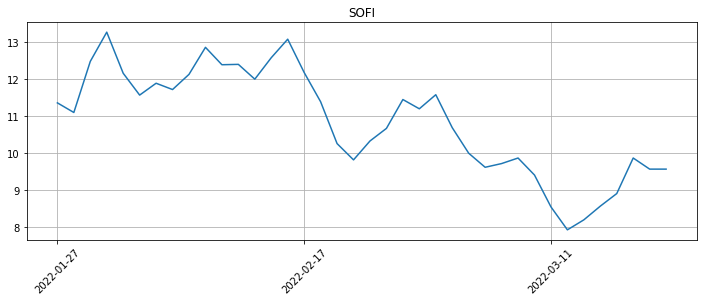

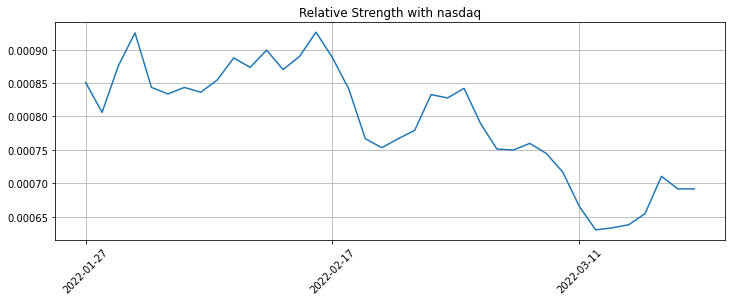

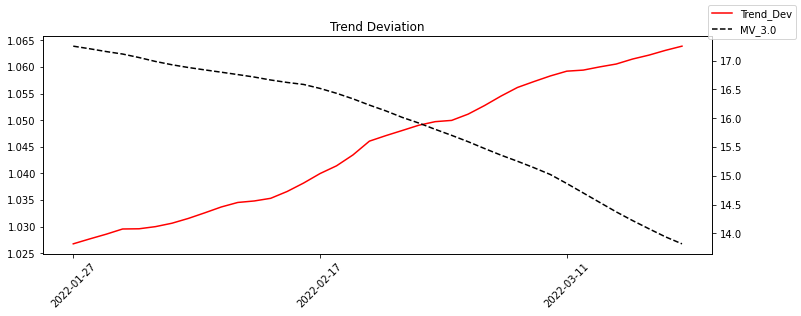

In [131]:
from Trend_Dev import Trend_Dev
Trend_Dev('SOFI',9,6,3)

TypeError: get_index_data() missing 1 required positional argument: 'self'

In [58]:
!pip install --upgrade pandas_datareader